<a href="https://colab.research.google.com/github/itz-jai/Stock-Trade-Predictor/blob/main/LSTM_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Dense,LSTM
from tensorflow.python.keras import Sequential 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
df = web.DataReader('^NSEI', data_source='yahoo', start='2000-01-01', end='2020-07-15') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-09-17,4549.049805,4482.850098,4518.450195,4494.649902,0.0,4494.649902
2007-09-18,4551.799805,4481.549805,4494.100098,4546.200195,0.0,4546.200195
2007-09-19,4739.000000,4550.250000,4550.250000,4732.350098,0.0,4732.350098
2007-09-20,4760.850098,4721.149902,4734.850098,4747.549805,0.0,4747.549805
2007-09-21,4855.700195,4733.700195,4752.950195,4837.549805,0.0,4837.549805
...,...,...,...,...,...,...
2020-07-10,10819.400391,10713.000000,10764.099609,10768.049805,590700.0,10768.049805
2020-07-13,10894.049805,10756.049805,10851.849609,10802.700195,554100.0,10802.700195
2020-07-14,10755.650391,10562.900391,10750.849609,10607.349609,532400.0,10607.349609


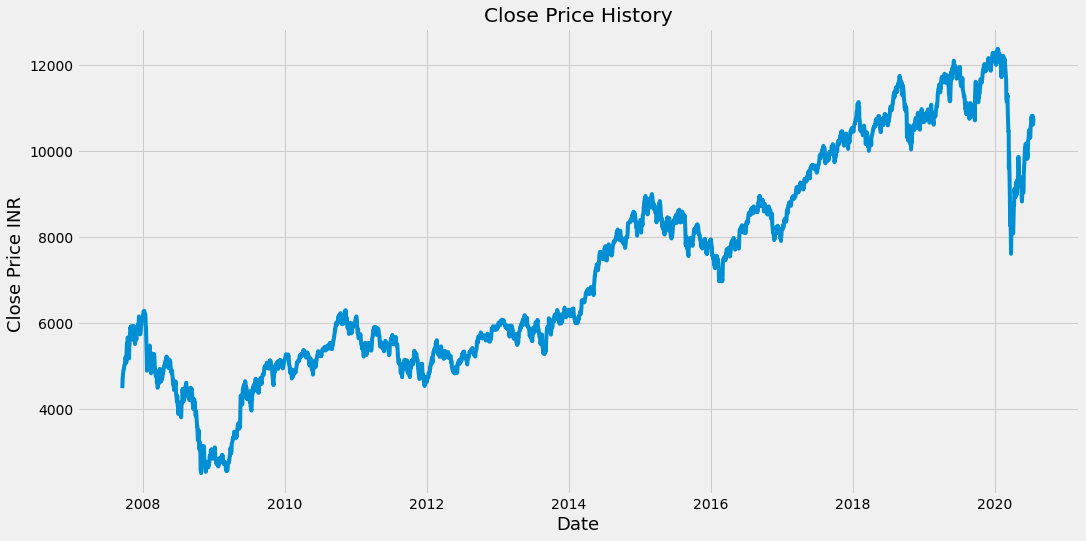

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR ',fontsize=18)
plt.show()


In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
training_data_len

2506

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.20028766],
       [0.20552752],
       [0.22444884],
       ...,
       [0.82161696],
       [0.82271987],
       [0.83509523]])

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
      print(x_train)
      print(y_train)
      print()

[array([0.20028766, 0.20552752, 0.22444884, 0.22599383, 0.23514194,
       0.24476274, 0.24543867, 0.24560638, 0.25171018, 0.25382444,
       0.25866278, 0.27308117, 0.27286265, 0.27054514, 0.26030435,
       0.28491783, 0.29652578, 0.30500302, 0.29518404, 0.31979752,
       0.31955864, 0.30850468, 0.28733191, 0.27353858, 0.27035709,
       0.29980385, 0.30208577, 0.3094856 , 0.32304001, 0.34373507,
       0.33995895, 0.34320143, 0.33972518, 0.34642868, 0.33777863,
       0.33159859, 0.33117677, 0.32267919, 0.31437983, 0.32233866,
       0.34698773, 0.34436529, 0.34383165, 0.34391295, 0.33102937,
       0.30868256, 0.30444397, 0.31351584, 0.32602843, 0.32261819,
       0.31442554, 0.31615863, 0.32918451, 0.33957777, 0.33890184,
       0.3472012 , 0.34869541, 0.35068762, 0.34929511, 0.36318497])]
[0.3694920673341844]

[array([0.20028766, 0.20552752, 0.22444884, 0.22599383, 0.23514194,
       0.24476274, 0.24543867, 0.24560638, 0.25171018, 0.25382444,
       0.25866278, 0.27308117, 0.272

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2446, 60, 1)

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2446/2446 [==============================] - 71s 29ms/step - loss: 7.0624e-04


In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

250.19659137467357

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


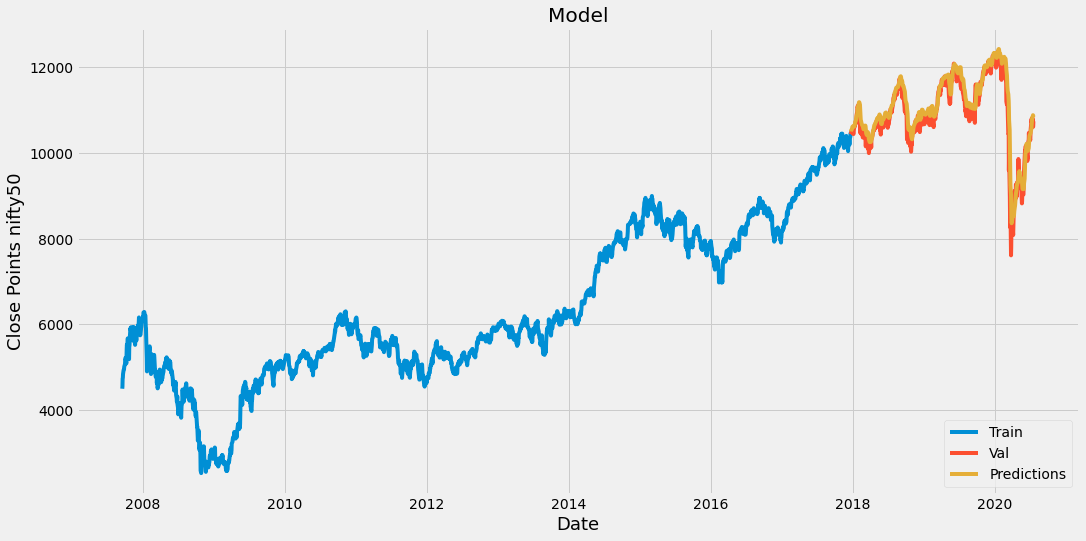

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Points nifty50', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2017-12-21,10440.299805,10501.601562
2017-12-22,10493.000000,10531.059570
2017-12-26,10531.500000,10560.153320
2017-12-27,10490.750000,10590.053711
2017-12-28,10477.900391,10608.520508
...,...,...
2020-07-10,10768.049805,10824.734375
2020-07-13,10802.700195,10857.869141
2020-07-14,10607.349609,10883.784180


In [ ]:
#Get the quote
nifty50_quote = web.DataReader('^NSEI', data_source='yahoo', start='2000-01-01', end='2020-07-16')
#Create a new dataframe
new_df = nifty50_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[10860.777]]


In [ ]:
nifty50_quote2 = web.DataReader('^NSEI', data_source='yahoo', start='2020-07-17', end='2020-07-17')
print(nifty50_quote2.Close)

Date
2020-07-17    10899.049805
Name: Close, dtype: float64
